# **Importing Libraries and Things**

In [238]:
#importing libraries
import math
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [239]:
#access data
df = pd.read_csv("/content/dataset.csv")

#replace the categorical data into numerical
def gender_to_numeric(x):
  if x=='Male':
    return 0
  else:
    return 1

def academic_to_numeric(x):
  if x=='Degree' or x=='Diploma' or x=='Postgraduates':
    return 1
  else:
    return 0

df['Gender_Num'] = df['Gender'].apply(gender_to_numeric)
df['Academic_Num'] = df['Gender'].apply(academic_to_numeric)

#dropping the column 
df = df.drop('Gender',1)
df = df.drop('AcademicLevel', 1)


#refined dataset
LoveData = df
LoveData


,Age,AvgInteract,StdyHour,BffTime,HobbyHour,SleepHour,Gender_Num,Academic_Num
0,20,26.0,1.0,1,8,10,1,0
1,20,17.0,1.0,2,2,6,0,0
2,20,29.0,1.0,2,2,6,0,0
3,20,40.0,1.0,8,4,6,0,0
4,20,6.0,2.0,7,8,5,1,0
...,...,...,...,...,...,...,...,...
163,18,8.0,12.0,5,2,4,1,0
164,18,11.0,13.0,5,1,6,1,0
165,18,19.0,13.0,5,2,4,1,0
166,18,11.0,14.0,5,7,5,1,0


# **Finding Outlier In The Data**

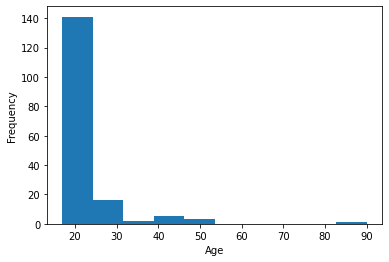

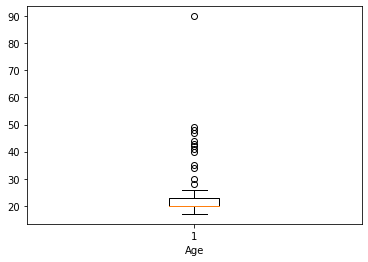

Text(0, 0.5, 'Average Interaction')

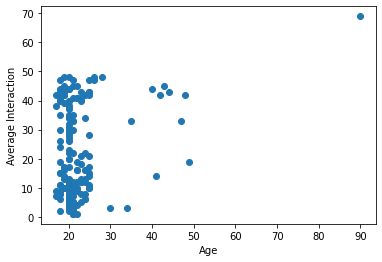

In [240]:
#Age
pyplot.hist(LoveData.Age)
pyplot.xlabel("Age")
pyplot.ylabel("Frequency")
pyplot.show()
pyplot.boxplot(LoveData.Age)
pyplot.xlabel("Age")
pyplot.show()
pyplot.scatter(LoveData.Age, LoveData.AvgInteract)
pyplot.xlabel("Age")
pyplot.ylabel("Average Interaction")

This dataset is skewed and needed to be changed

In [241]:
LoveData.Age.describe()

count    168.000000
mean      22.577381
std        7.731650
min       17.000000
25%       20.000000
50%       20.000000
75%       23.000000
max       90.000000
Name: Age, dtype: float64

26.0


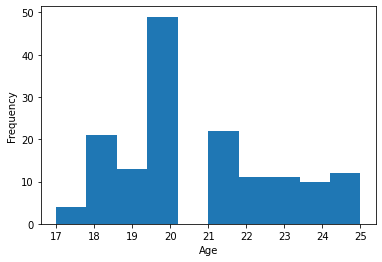

In [242]:
#Testing how to find outliers
max_threshold = LoveData['Age'].quantile(0.92) #everything above this is considered as an outlier
print(max_threshold)
#remove all the outlier in the data
LoveData = LoveData[LoveData['Age'] < max_threshold]
pyplot.hist(LoveData.Age)
pyplot.xlabel("Age")
pyplot.ylabel("Frequency")
pyplot.show()

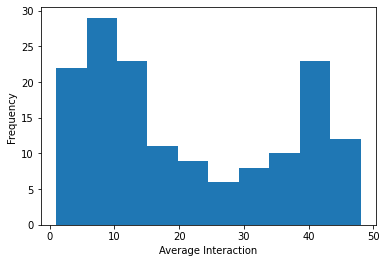

In [243]:
#AvgInteract
pyplot.hist(LoveData.AvgInteract)
pyplot.xlabel("Average Interaction")
pyplot.ylabel("Frequency")
pyplot.show()

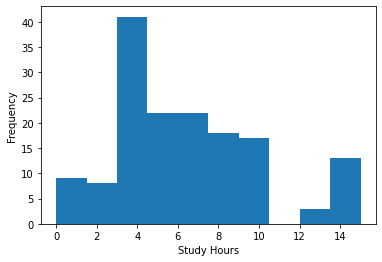

In [244]:
#StudyHour
pyplot.hist(LoveData.StdyHour)
pyplot.xlabel("Study Hours")
pyplot.ylabel("Frequency")
pyplot.show()

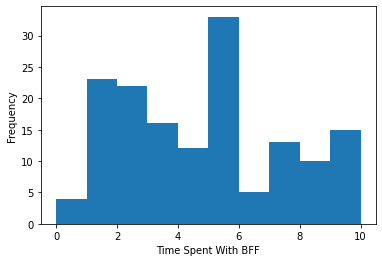

In [245]:
#BffTime
pyplot.hist(LoveData.BffTime)
pyplot.xlabel("Time Spent With BFF")
pyplot.ylabel("Frequency")
pyplot.show()

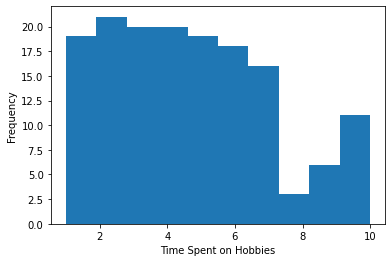

In [246]:
#HobbyHour
pyplot.hist(LoveData.HobbyHour)
pyplot.xlabel("Time Spent on Hobbies")
pyplot.ylabel("Frequency")
pyplot.show()

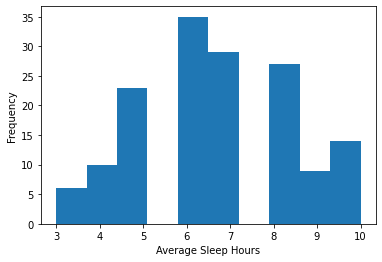

In [247]:
#SleepHour
pyplot.hist(LoveData.SleepHour)
pyplot.xlabel("Average Sleep Hours")
pyplot.ylabel("Frequency")
pyplot.show()

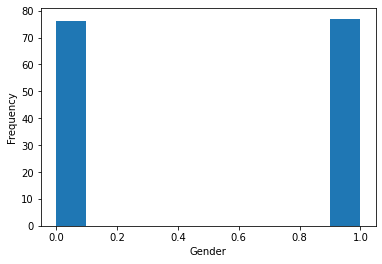

In [248]:
#Gender
pyplot.hist(LoveData.Gender_Num)
pyplot.xlabel("Gender")
pyplot.ylabel("Frequency")
pyplot.show()

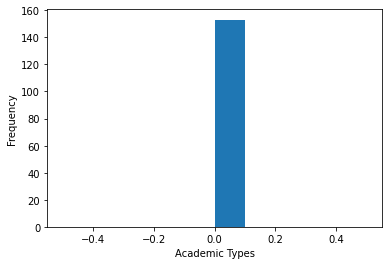

In [249]:
#AcademicLevel
pyplot.hist(LoveData.Academic_Num)
pyplot.xlabel("Academic Types")
pyplot.ylabel("Frequency")
pyplot.show()

# **Training and Test Data**

In [250]:
X = LoveData.drop("AvgInteract", 1)
y = LoveData["AvgInteract"]

#splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) #test size is 20% of the dataset

#printing the shapes of testing and training dataset
print("shape of original dataset :", LoveData.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

x_test


shape of original dataset : (153, 8)
shape of input - training set (122, 7)
shape of output - training set (122,)
shape of input - testing set (31, 7)
shape of output - testing set (31,)


,Age,StdyHour,BffTime,HobbyHour,SleepHour,Gender_Num,Academic_Num
150,18,4.0,7,10,8,0,0
68,22,14.0,5,3,5,0,0
146,18,1.0,5,8,8,1,0
49,21,5.0,2,5,8,1,0
93,25,5.0,1,4,5,0,0
51,21,7.0,7,7,10,0,0
167,20,6.0,2,2,6,0,0
63,22,7.0,8,4,8,0,0
148,18,2.0,1,3,7,1,0
111,19,8.0,1,3,3,1,0


# **Selecting Feature and Testing Model**

## **Linear Regression Feature Importance**

In [251]:
#define the model
model = LinearRegression()
#fit the model
model.fit(x_train,y_train)
#get importance
importance = model.coef_
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

Feature : 0, Score: -0.51018
Feature : 1, Score: -0.26365
Feature : 2, Score: -0.67167
Feature : 3, Score: 0.12995
Feature : 4, Score: 0.14774
Feature : 5, Score: 3.08528
Feature : 6, Score: 0.00000


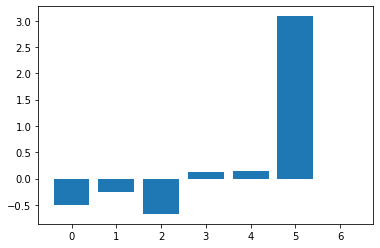

In [252]:
#plotting the feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **CART Regression Feature Importance**

In [253]:
#define the model
model = DecisionTreeRegressor()
#fit the model
model.fit(x_train,y_train)
#get importance
importance = model.feature_importances_
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

Feature : 0, Score: 0.18277
Feature : 1, Score: 0.19790
Feature : 2, Score: 0.21341
Feature : 3, Score: 0.19572
Feature : 4, Score: 0.20825
Feature : 5, Score: 0.00195
Feature : 6, Score: 0.00000


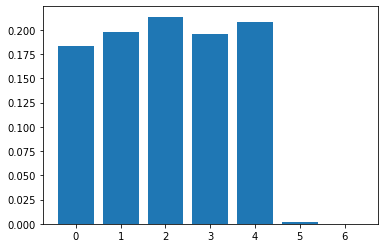

In [254]:
#plotting the feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **Random Forest Regression Feature Importance**

In [255]:
#Finding MAE value
#define the model
model = RandomForestRegressor()
#fit the model
model.fit(x_train,y_train)
#get importance
importance = model.feature_importances_
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

Feature : 0, Score: 0.16213
Feature : 1, Score: 0.21405
Feature : 2, Score: 0.20873
Feature : 3, Score: 0.17621
Feature : 4, Score: 0.20014
Feature : 5, Score: 0.03874
Feature : 6, Score: 0.00000


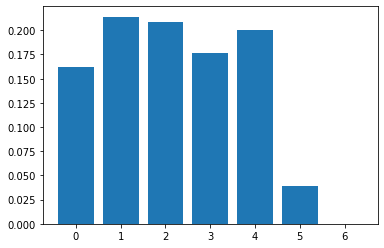

In [256]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **XGBoost Regression Feature Importance**

In [257]:
#define the model
model = XGBRegressor()
#fit the model
model.fit(x_train,y_train)
#get importance
importance = model.feature_importances_
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

[10:17:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature : 0, Score: 0.16729
Feature : 1, Score: 0.13714
Feature : 2, Score: 0.19304
Feature : 3, Score: 0.13796
Feature : 4, Score: 0.22317
Feature : 5, Score: 0.14141
Feature : 6, Score: 0.00000


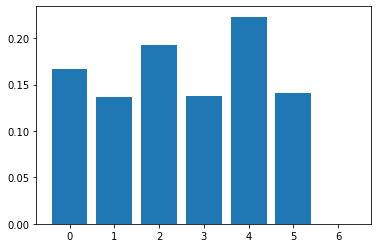

In [258]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **Permutation Feature Importance**

In [259]:
#define the model
model = KNeighborsRegressor()
#fit the model
model.fit(x_train,y_train)
# perform permutation importance
results = permutation_importance(model, x_train,y_train, scoring='neg_mean_squared_error')
#get importance
importance = results.importances_mean
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

Feature : 0, Score: 15.59993
Feature : 1, Score: 42.89859
Feature : 2, Score: 21.87239
Feature : 3, Score: 35.92475
Feature : 4, Score: 23.95626
Feature : 5, Score: 2.70616
Feature : 6, Score: 0.00000


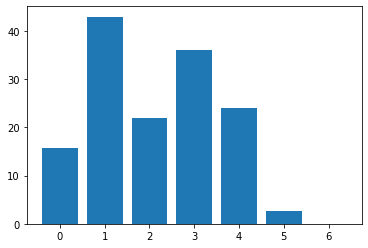

In [260]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# **MAE Values**

In [261]:
#LinearRegression
X = x_train.drop("Age",1)
X = X.drop("StdyHour", 1)
y = y_train

model = LinearRegression()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -13.479 (1.488)


In [262]:
#CART
X = x_train.drop("Gender_Num",1)
X = x_train.drop("Academic_Num",1)
y = y_train

model = DecisionTreeRegressor()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -13.438 (3.496)


In [263]:
#Random Forest
X = x_train.drop("Gender_Num",1)
X = X.drop("Academic_Num",1)
y = y_train

model = RandomForestRegressor()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -11.765 (1.754)


In [264]:
#XGBoost
X = x_train.drop("Gender_Num",1)
X = X.drop("Academic_Num",1)
y = y_train

model = XGBRegressor()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[10:17:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: -11.920 (1.945)


In [265]:
#Permutation
X = x_train.drop("Gender_Num",1)
X = X.drop("Academic_Num",1)
y = y_train

model = KNeighborsRegressor()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -13.782 (2.148)


# **Fitting The Random Forest Regression Model**

In [266]:
#Random Forest Regression
X = x_train.drop("Gender_Num",1)
X = X.drop("Academic_Num",1)
y = y_train

#Dropping features in the test dataset
X_test = x_test.drop("Gender_Num",1)
X_test = X_test.drop("Academic_Num",1)

#Fitting Random Forest Regression to the dataset
model = RandomForestRegressor()
model.fit(X,y)

#Predicting the result
y_pred = model.predict(X_test)

#Comparison dataframe
pred_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred.reshape(-1)})
#calculate accuracy
# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_error(y_test, y_pred) 
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('Initial model achieves on the test set an accuracy of', round(accuracy, 2),'%')


Initial model achieves on the test set an accuracy of 84.72 %


### **Fine Tuning the Random Forest Model**


Grid Search 

In [267]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X,y)


cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


14.916389979433491 {'bootstrap': True, 'max_depth': 10, 'n_estimators': 10}
14.238289335208957 {'bootstrap': True, 'max_depth': 10, 'n_estimators': 25}
14.350607456466275 {'bootstrap': True, 'max_depth': 50, 'n_estimators': 10}
13.903389504523949 {'bootstrap': True, 'max_depth': 50, 'n_estimators': 25}
14.521899727485957 {'bootstrap': True, 'max_depth': None, 'n_estimators': 10}
14.946048147749849 {'bootstrap': True, 'max_depth': None, 'n_estimators': 25}
17.829641752412776 {'bootstrap': False, 'max_depth': 10, 'n_estimators': 10}
17.873157148986646 {'bootstrap': False, 'max_depth': 10, 'n_estimators': 25}
18.042841481854136 {'bootstrap': False, 'max_depth': 50, 'n_estimators': 10}
17.76603749306885 {'bootstrap': False, 'max_depth': 50, 'n_estimators': 25}
17.964010802624482 {'bootstrap': False, 'max_depth': None, 'n_estimators': 10}
17.716774399653147 {'bootstrap': False, 'max_depth': None, 'n_estimators': 25}


In [268]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [269]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(X)
errors = abs(grid_best - y)
# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_error(y, grid_best)
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 95.56 %


# **Evaluating The Model On The Test Set**

In [270]:
final_model = grid_search_forest.best_estimator_
# Predicting test set results
final_pred = final_model.predict(X_test) 
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 17.29


In [271]:
#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_error(y_test, final_pred)
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 84.7 %


# **Visualization of Random Forest Hyperparameters**

---
## Getting the accuracy


Text(0.5, 0, 'Tree depth')

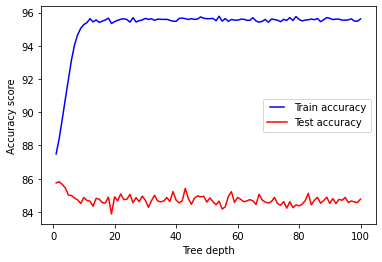

In [272]:
max_depths = np.linspace(1, 100, 100, endpoint=True)

train_results = []
test_results = []

for i in max_depths:
    dt = RandomForestRegressor(max_depth=i)
    dt.fit(X, y)    
    #compute accuracy for train data
    housing_tree = dt.predict(X)
    # Calculate mean absolute percentage error (MAPE)
    mape = mean_absolute_error(y, housing_tree)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    train_results.append(accuracy)
    
    #now again for test data
    housing_tree = dt.predict(X_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = mean_absolute_error(y_test, housing_tree)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = pyplot.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = pyplot.plot(max_depths, test_results, 'r', label= 'Test accuracy')

pyplot.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
pyplot.ylabel('Accuracy score')
pyplot.xlabel('Tree depth')

In [273]:
X_test

,Age,StdyHour,BffTime,HobbyHour,SleepHour
150,18,4.0,7,10,8
68,22,14.0,5,3,5
146,18,1.0,5,8,8
49,21,5.0,2,5,8
93,25,5.0,1,4,5
51,21,7.0,7,7,10
167,20,6.0,2,2,6
63,22,7.0,8,4,8
148,18,2.0,1,3,7
111,19,8.0,1,3,3


# **Testing A Specific Data**

In [274]:
#Testing a specific data
X_test

#20, 4, 2, 0, 6

test_test = { 'Age' : [20],'StdyHour' : [4], 'BffTime' : [2], 'HobbyHour' : [0] , 'SleepHour' : [6]}
test_DF = pd.DataFrame(test_test, columns = ['Age', 'StdyHour', 'BffTime', 'HobbyHour', 'SleepHour'])
test_pred = final_model.predict(test_DF)
test_pred/4


array([5.756])

In [275]:
#Linear Regression
X = x_train.drop("Age",1)
X = X.drop("Academic_Num",1)
y = y_train
m = y.size

#Dropping features in the test dataset
X_test = x_test.drop("Age",1)
X_test = X_test.drop("Academic_Num",1)

#Fitting Random Forest Regression to the dataset
model = LinearRegression()
model.fit(X,y)

#Predicting the result
y_pred = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

print(model.score(X, y))
 

0.029117562216716353
